SHARED ROOM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#JALAMOS DATASET
df = pd.read_csv('NEWYORK_SINATIPICOS1.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36322 non-null  float64
 1   listing_url                                   36322 non-null  object 
 2   scrape_id                                     36322 non-null  float64
 3   last_scraped                                  36322 non-null  object 
 4   source                                        36322 non-null  object 
 5   name                                          36322 non-null  object 
 6   description                                   36322 non-null  object 
 7   neighborhood_overview                         36322 non-null  object 
 8   picture_url                                   36322 non-null  object 
 9   host_id                                       36322 non-null 

In [4]:
# 1) Filtrar solo anuncios de tipo "shared room"
sharedroom_df = df[df["room_type"] == "Shared room"].copy()
print(sharedroom_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 642 to 36263
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            206 non-null    float64
 1   listing_url                                   206 non-null    object 
 2   scrape_id                                     206 non-null    float64
 3   last_scraped                                  206 non-null    object 
 4   source                                        206 non-null    object 
 5   name                                          206 non-null    object 
 6   description                                   206 non-null    object 
 7   neighborhood_overview                         206 non-null    object 
 8   picture_url                                   206 non-null    object 
 9   host_id                                       206 non-null    floa

In [5]:
#  Asegurar que las columnas sean numéricas
sharedroom_df["price"] = (
    sharedroom_df["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)
sharedroom_df["host_acceptance_rate"] = (
    sharedroom_df["host_acceptance_rate"]  
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
)


In [6]:
num = df.select_dtypes(include=["number"])  # Solo columnas numéricas

# Quitar columnas problemáticas:
# - con pocos datos (<2 no nulos)
# - sin variación (nunqiue<=1)
bad = [c for c in num.columns if (num[c].count() < 2) or (num[c].nunique(dropna=True) <= 1)]

# (opcional) quitar identificadores que no tienen sentido en correlación
bad += [c for c in ["id", "scrape_id", "host_id"] if c in num.columns]

# Eliminar columnas
num = num.drop(columns=list(set(bad)))

In [7]:
# quitar IDs y columnas malas
drop_ids = [c for c in ["id","scrape_id","host_id"] if c in num.columns]
bad = [c for c in num.columns if (num[c].count()<2) or (num[c].nunique(dropna=True)<=1)]
num = num.drop(columns=list(set(drop_ids+bad)))

# --- Correlación bonita ---
corr = num.corr().round(2)


display(corr)  # tabla tipo DataFrame, no texto

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.00,0.15,0.27,0.25,0.02,-0.02,0.02,-0.15,-0.21,-0.21,...,0.02,0.03,0.02,0.02,0.02,0.01,0.25,0.19,-0.02,0.18
host_acceptance_rate,0.15,1.00,0.03,-0.00,-0.03,-0.03,0.06,0.07,-0.04,0.05,...,0.04,0.05,0.04,0.04,0.04,0.04,0.01,-0.02,0.05,0.08
host_listings_count,0.27,0.03,1.00,0.69,0.00,0.01,0.01,-0.14,-0.13,-0.11,...,0.01,0.01,0.01,0.01,0.01,0.00,0.79,0.07,0.09,0.06
host_total_listings_count,0.25,-0.00,0.69,1.00,0.00,0.01,-0.01,-0.13,-0.12,-0.10,...,-0.01,-0.00,-0.00,-0.01,-0.00,-0.01,0.60,0.09,0.07,0.06
latitude,0.02,-0.03,0.00,0.00,1.00,0.06,-0.02,0.06,0.07,0.03,...,-0.05,-0.05,-0.05,-0.05,-0.04,-0.05,0.02,0.02,-0.03,-0.04
longitude,-0.02,-0.03,0.01,0.01,0.06,1.00,-0.09,-0.32,-0.05,0.02,...,0.06,0.06,0.06,0.06,0.03,0.06,0.00,-0.03,0.13,0.07
accommodates,0.02,0.06,0.01,-0.01,-0.02,-0.09,1.00,0.37,0.02,0.02,...,0.07,0.08,0.07,0.07,0.07,0.07,0.00,0.31,-0.22,0.00
price,-0.15,0.07,-0.14,-0.13,0.06,-0.32,0.37,1.00,0.16,0.13,...,-0.04,-0.04,-0.05,-0.05,-0.04,-0.05,-0.12,0.24,-0.30,-0.14
maximum_nights,-0.21,-0.04,-0.13,-0.12,0.07,-0.05,0.02,0.16,1.00,0.73,...,-0.04,-0.05,-0.04,-0.04,-0.04,-0.04,-0.13,-0.00,-0.08,-0.13
minimum_maximum_nights,-0.21,0.05,-0.11,-0.10,0.03,0.02,0.02,0.13,0.73,1.00,...,0.05,0.05,0.05,0.06,0.05,0.06,-0.11,0.03,-0.04,-0.07


In [8]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(corr)
Corr_Factors1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,maximum_nights,minimum_maximum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
host_response_rate,1.00,0.15,0.27,0.25,0.02,0.02,0.02,0.15,0.21,0.21,...,0.02,0.03,0.02,0.02,0.02,0.01,0.25,0.19,0.02,0.18
host_acceptance_rate,0.15,1.00,0.03,0.00,0.03,0.03,0.06,0.07,0.04,0.05,...,0.04,0.05,0.04,0.04,0.04,0.04,0.01,0.02,0.05,0.08
host_listings_count,0.27,0.03,1.00,0.69,0.00,0.01,0.01,0.14,0.13,0.11,...,0.01,0.01,0.01,0.01,0.01,0.00,0.79,0.07,0.09,0.06
host_total_listings_count,0.25,0.00,0.69,1.00,0.00,0.01,0.01,0.13,0.12,0.10,...,0.01,0.00,0.00,0.01,0.00,0.01,0.60,0.09,0.07,0.06
latitude,0.02,0.03,0.00,0.00,1.00,0.06,0.02,0.06,0.07,0.03,...,0.05,0.05,0.05,0.05,0.04,0.05,0.02,0.02,0.03,0.04
longitude,0.02,0.03,0.01,0.01,0.06,1.00,0.09,0.32,0.05,0.02,...,0.06,0.06,0.06,0.06,0.03,0.06,0.00,0.03,0.13,0.07
accommodates,0.02,0.06,0.01,0.01,0.02,0.09,1.00,0.37,0.02,0.02,...,0.07,0.08,0.07,0.07,0.07,0.07,0.00,0.31,0.22,0.00
price,0.15,0.07,0.14,0.13,0.06,0.32,0.37,1.00,0.16,0.13,...,0.04,0.04,0.05,0.05,0.04,0.05,0.12,0.24,0.30,0.14
maximum_nights,0.21,0.04,0.13,0.12,0.07,0.05,0.02,0.16,1.00,0.73,...,0.04,0.05,0.04,0.04,0.04,0.04,0.13,0.00,0.08,0.13
minimum_maximum_nights,0.21,0.05,0.11,0.10,0.03,0.02,0.02,0.13,0.73,1.00,...,0.05,0.05,0.05,0.06,0.05,0.06,0.11,0.03,0.04,0.07


In [9]:
sharedroom_df[["availability_365", "number_of_reviews"]].corr()


,availability_365,number_of_reviews
availability_365,1.000000,0.050281
number_of_reviews,0.050281,1.000000


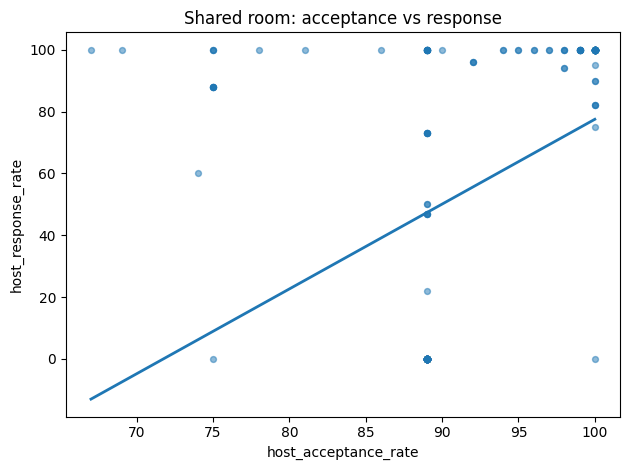

In [10]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

d = sharedroom_df.copy()
rt = 'room_type' if 'room_type' in d.columns else 'room type'
for c in ['host_acceptance_rate','host_response_rate']:
    d[c] = pd.to_numeric(d[c].astype(str).str.replace('%',''), errors='coerce')

shared = d.loc[d[rt].astype(str).str.lower().eq('shared room'),
               ['host_acceptance_rate','host_response_rate']].dropna()

sns.regplot(x='host_acceptance_rate', y='host_response_rate', data=shared,
            scatter_kws={'s':18, 'alpha':.5}, line_kws={'linewidth':2}, ci=None)
plt.title('Shared room: acceptance vs response')
plt.xlabel('host_acceptance_rate'); plt.ylabel('host_response_rate')
plt.tight_layout(); plt.show()